# Libraries

In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [307]:
# Load data from CSV into a DataFrame
df = pd.read_csv('data.csv')

# Remove the 'LoanID' column
df = df.drop(columns='LoanID')

# Relabel the 'Default' column from 0, 1 to 'NonDefault' and 'Default'
df['Default'] = df['Default'].replace({0: 'NonDefault', 1: 'Default'})

# Show the first 5 rows
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,NonDefault
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,NonDefault
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,Default
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,NonDefault
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,NonDefault


# Exploratory Analysis

In [308]:
# Set the plot style to ggplot
plt.style.use('ggplot')

# Define colors for different loan statuses
color_palette = {'Default': 'red', 'NonDefault': 'black'}

## Response

In [309]:
# Print the number of loan defaults and non-defaults
print(f"Number of loan defaults: {df['Default'].value_counts()['Default']}")
print(f"Number of non-defaults: {df['Default'].value_counts()['NonDefault']}")

Number of loan defaults: 29653
Number of non-defaults: 225694


In [310]:
# Get the proportion of loan defaults and non-defaults
proportion_default = df['Default'].value_counts(normalize=True)['Default'].round(2)  
proportion_nondefault = df['Default'].value_counts(normalize=True)['NonDefault'].round(2)  

# Print the proportion of loan defaults and non-defaults
print(f"Proportion of loan defaults: {proportion_default}")
print(f"Proportion of non-defaults: {proportion_nondefault}")

Proportion of loan defaults: 0.12
Proportion of non-defaults: 0.88


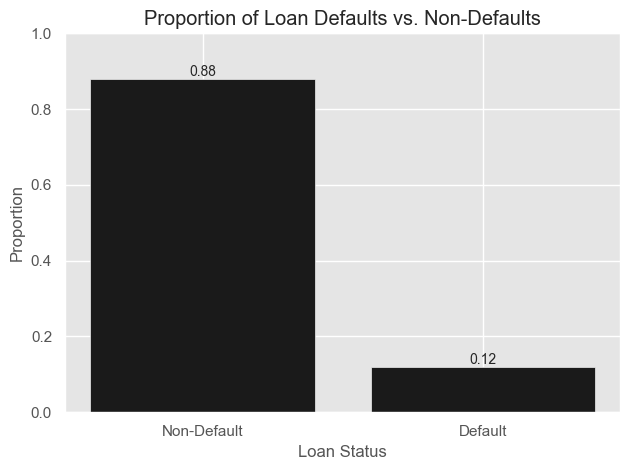

In [311]:
# Create a bar plot to visualize the proportions of loan defaults and non-defaults
bars = plt.bar(x=['NonDefault', 'Default'],
        height=[proportion_nondefault, proportion_default],
        color='k' # Black color for bars
              )

# Set the y-axis ticks
plt.yticks(np.arange(0, 1.2, 0.2))

# Set the x-axis ticks
plt.xticks([0, 1], ['Non-Default', 'Default'])

# Set the title, y-axis label, and x-axis label
plt.title('Proportion of Loan Defaults vs. Non-Defaults')
plt.ylabel('Proportion')
plt.xlabel('Loan Status')

# Add the proportion values as text labels above each bar
for bar in bars:
    
    # Get the height of the current bar
    height = bar.get_height()  
    
    plt.text(
        bar.get_x() + bar.get_width() / 2, # X-coordindate for text. bar.get_x() returns the X-coordinate of the left edge of the bar. bar.get_width() / 2 calculates half the width of the bar.
        height,  # Y-coordinate for text
        f'{height:.2f}',  # Text content
        ha='center',  # Horizontal alignment: centers the text over the bar
        va='bottom',  # Vertical alignment: positions the text just above the bar
        fontsize=10  # Sets the font size of the text
    )

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## Continuous Variables

### NumCreditLines and LoanTerm

In [312]:
# List of continuous variables for which we want to create count plots
continuous_variables_countplot = [
    'NumCreditLines',
    'LoanTerm'
]

# Transform the DataFrame from wide to long format for easier plotting
df_long_countplot = df.melt(id_vars='Default',  
                      value_vars=continuous_variables_bar,  
                      var_name='Variable',  
                      value_name='Value' 
                           )

# Display the first 5 rows of the transformed DataFrame
df_long_countplot.head()

,Default,Variable,Value
0,NonDefault,NumCreditLines,4
1,NonDefault,NumCreditLines,1
2,Default,NumCreditLines,3
3,NonDefault,NumCreditLines,3
4,NonDefault,NumCreditLines,4


In [313]:
# Display the last 5 rows of the transformed DataFrame
df_long_countplot.tail()

,Default,Variable,Value
510689,NonDefault,LoanTerm,12
510690,Default,LoanTerm,24
510691,NonDefault,LoanTerm,60
510692,NonDefault,LoanTerm,48
510693,NonDefault,LoanTerm,12


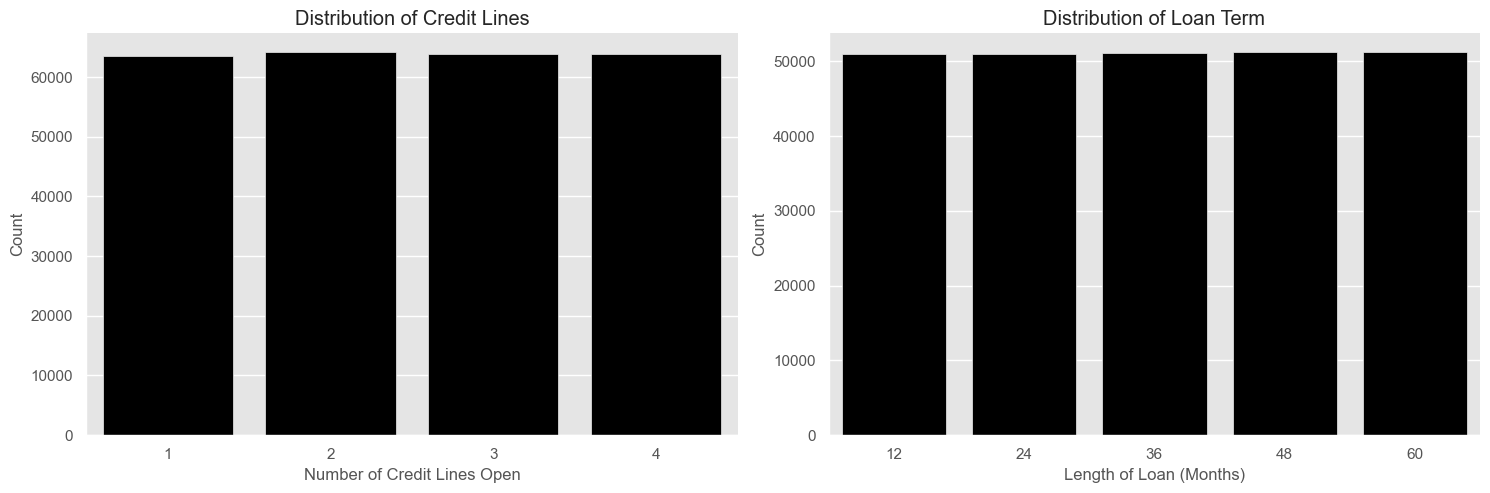

In [314]:
# Create a FacetGrid to create separate plots for each variable in 'Variable' column of the DataFrame
g = sns.FacetGrid(df_long_countplot,  # DataFrame to be used for the grid
                  col='Variable',  # Create separate plots for each unique value in 'Variable'
                  height=5,  # Height of each subplot
                  aspect=1.5,  # Aspect ratio of each subplot
                  sharex=False,  # Do not share the x-axis between subplots
                  sharey=False  # Do not share the y-axis between subplots
                 )

# Create countplot for each variable in 'Variable'
g.map_dataframe(sns.countplot,  
                x='Value',  
                color='black'
               )

# Set the titles for each subplot
g.axes.flat[0].set_title('Distribution of Credit Lines')
g.axes.flat[1].set_title('Distribution of Loan Term')

# Set the x-axis labels for each subplot
g.axes.flat[0].set_xlabel('Number of Credit Lines Open')
g.axes.flat[1].set_xlabel('Length of Loan (Months)')

# Set the y-axis labels for each subplot
g.axes.flat[0].set_ylabel('Count')
g.axes.flat[1].set_ylabel('Count')

# Display the plots
plt.show()

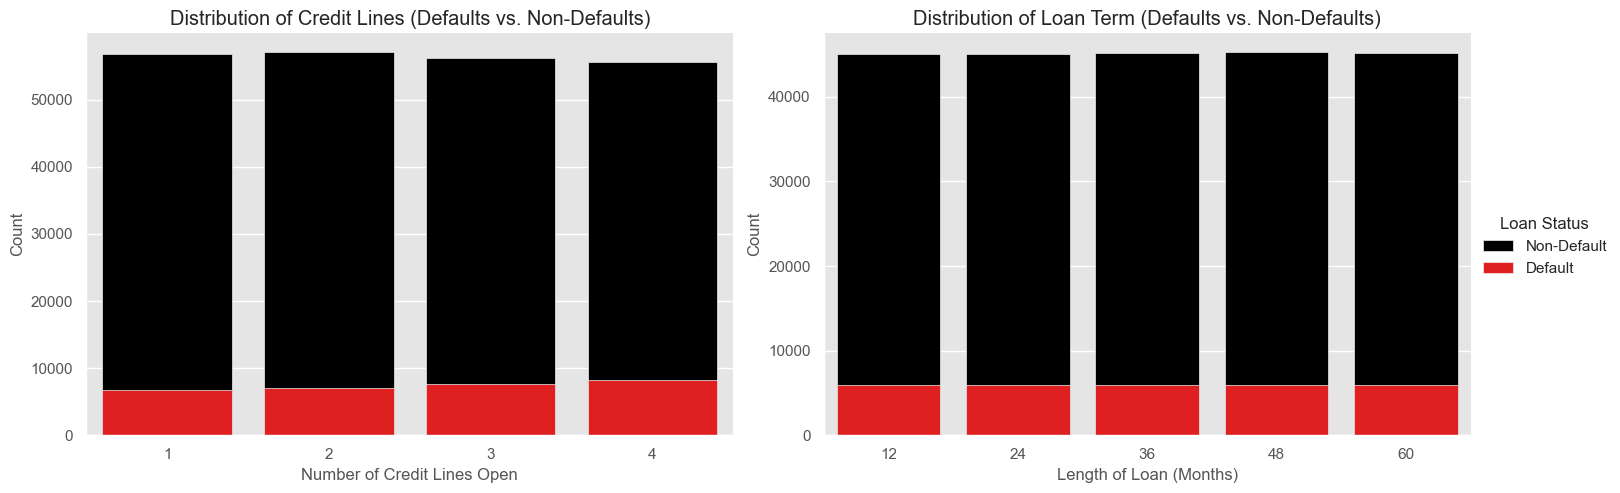

In [315]:
# Create a FacetGrid to generate separate plots for each variable in the 'Variable' column of the DataFrame
g = sns.FacetGrid(df_long_countplot,  
                  col='Variable',  
                  height=5,  
                  aspect=1.5,  
                  hue='Default',  # Hue by 'Default' column
                  palette=color_palette,  # Set the color palette for the hue categories
                  sharex=False,  
                  sharey=False  
                 )

# Create a count plot for each variable in 'Variable' with 'Default' as the hue
g.map_dataframe(sns.countplot,  
                x='Value'  
               )

# Set the titles for each subplot
g.axes.flat[0].set_title('Distribution of Credit Lines (Defaults vs. Non-Defaults)') 
g.axes.flat[1].set_title('Distribution of Loan Term (Defaults vs. Non-Defaults)')  

# Set the x-axis labels for each subplot
g.axes.flat[0].set_xlabel('Number of Credit Lines Open') 
g.axes.flat[1].set_xlabel('Length of Loan (Months)')  

# Set the y-axis labels for each subplot
g.axes.flat[0].set_ylabel('Count')  
g.axes.flat[1].set_ylabel('Count')  

# Add a legend to the plots
g.add_legend()  
g.legend.set_title('Loan Status')  
g.legend.texts[0].set_text('Non-Default')  
g.legend.texts[1].set_text('Default') 

# Display the plots
plt.show()

### Age, Income, LoanAmount, CreditScore, MonthsEmployed, InterestRate, and DTIRatio

In [316]:
# List of continuous variables for which to create KDE plots
continuous_variables_kde = [
    'Age',
    'Income',
    'LoanAmount',
    'CreditScore',
    'MonthsEmployed',
    'InterestRate',
    'DTIRatio'
]

# Transform the DataFrame from wide to long format for easier plotting
df_long_kde = df.melt(id_vars='Default',  
                      value_vars=continuous_variables_kde,  
                      var_name='Variable',  
                      value_name='Value')  

# Display the first 5 rows of the transformed DataFrame
df_long_kde.head()

,Default,Variable,Value
0,NonDefault,Age,56.0
1,NonDefault,Age,69.0
2,Default,Age,46.0
3,NonDefault,Age,32.0
4,NonDefault,Age,60.0


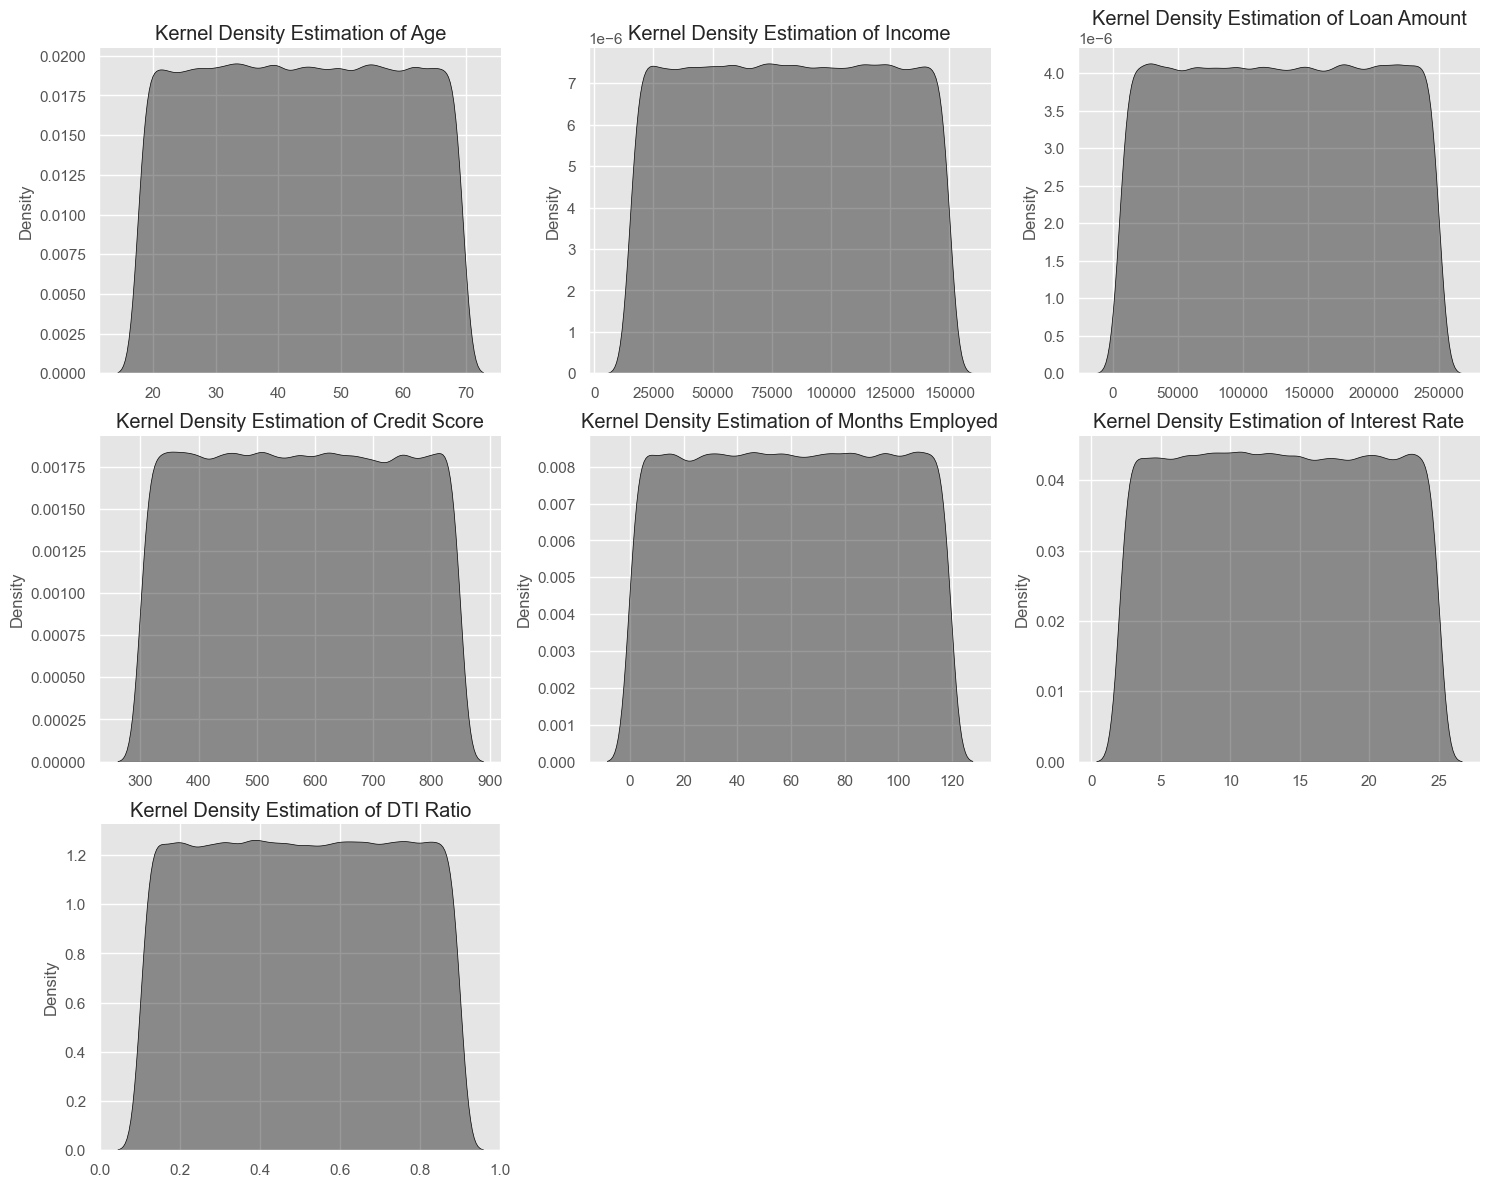

In [317]:
# Create a FacetGrid to generate separate plots for each variable in the 'Variable' column of the DataFrame
g = sns.FacetGrid(df_long_kde,  
                  col='Variable', 
                  height=4,  
                  aspect=1.25,  
                  sharex=False,  
                  sharey=False,  
                  col_wrap=3  # Arrange the subplots into multiple rows, with a maximum of 3 plots per row
                 )  

# Create kde plot for each variable in 'Variable'
g.map(sns.kdeplot,
      'Value',
      color='black',
      fill=True,
      alpha=0.4
     )  


# List of variable names for setting subplot titles
variables_kde = ['Age', 'Income', 'Loan Amount',
                 'Credit Score', 'Months Employed', 'Interest Rate',
                 'DTI Ratio']

# Loop through each subplot to set titles and labels
for i, variable in enumerate(variables_kde):
    g.axes.flat[i].set_title(f'Kernel Density Estimation of {variable}')  
    g.axes.flat[i].set_xlabel('')  
    g.axes.flat[i].set_ylabel('Density')  

# Display the plots
plt.show()

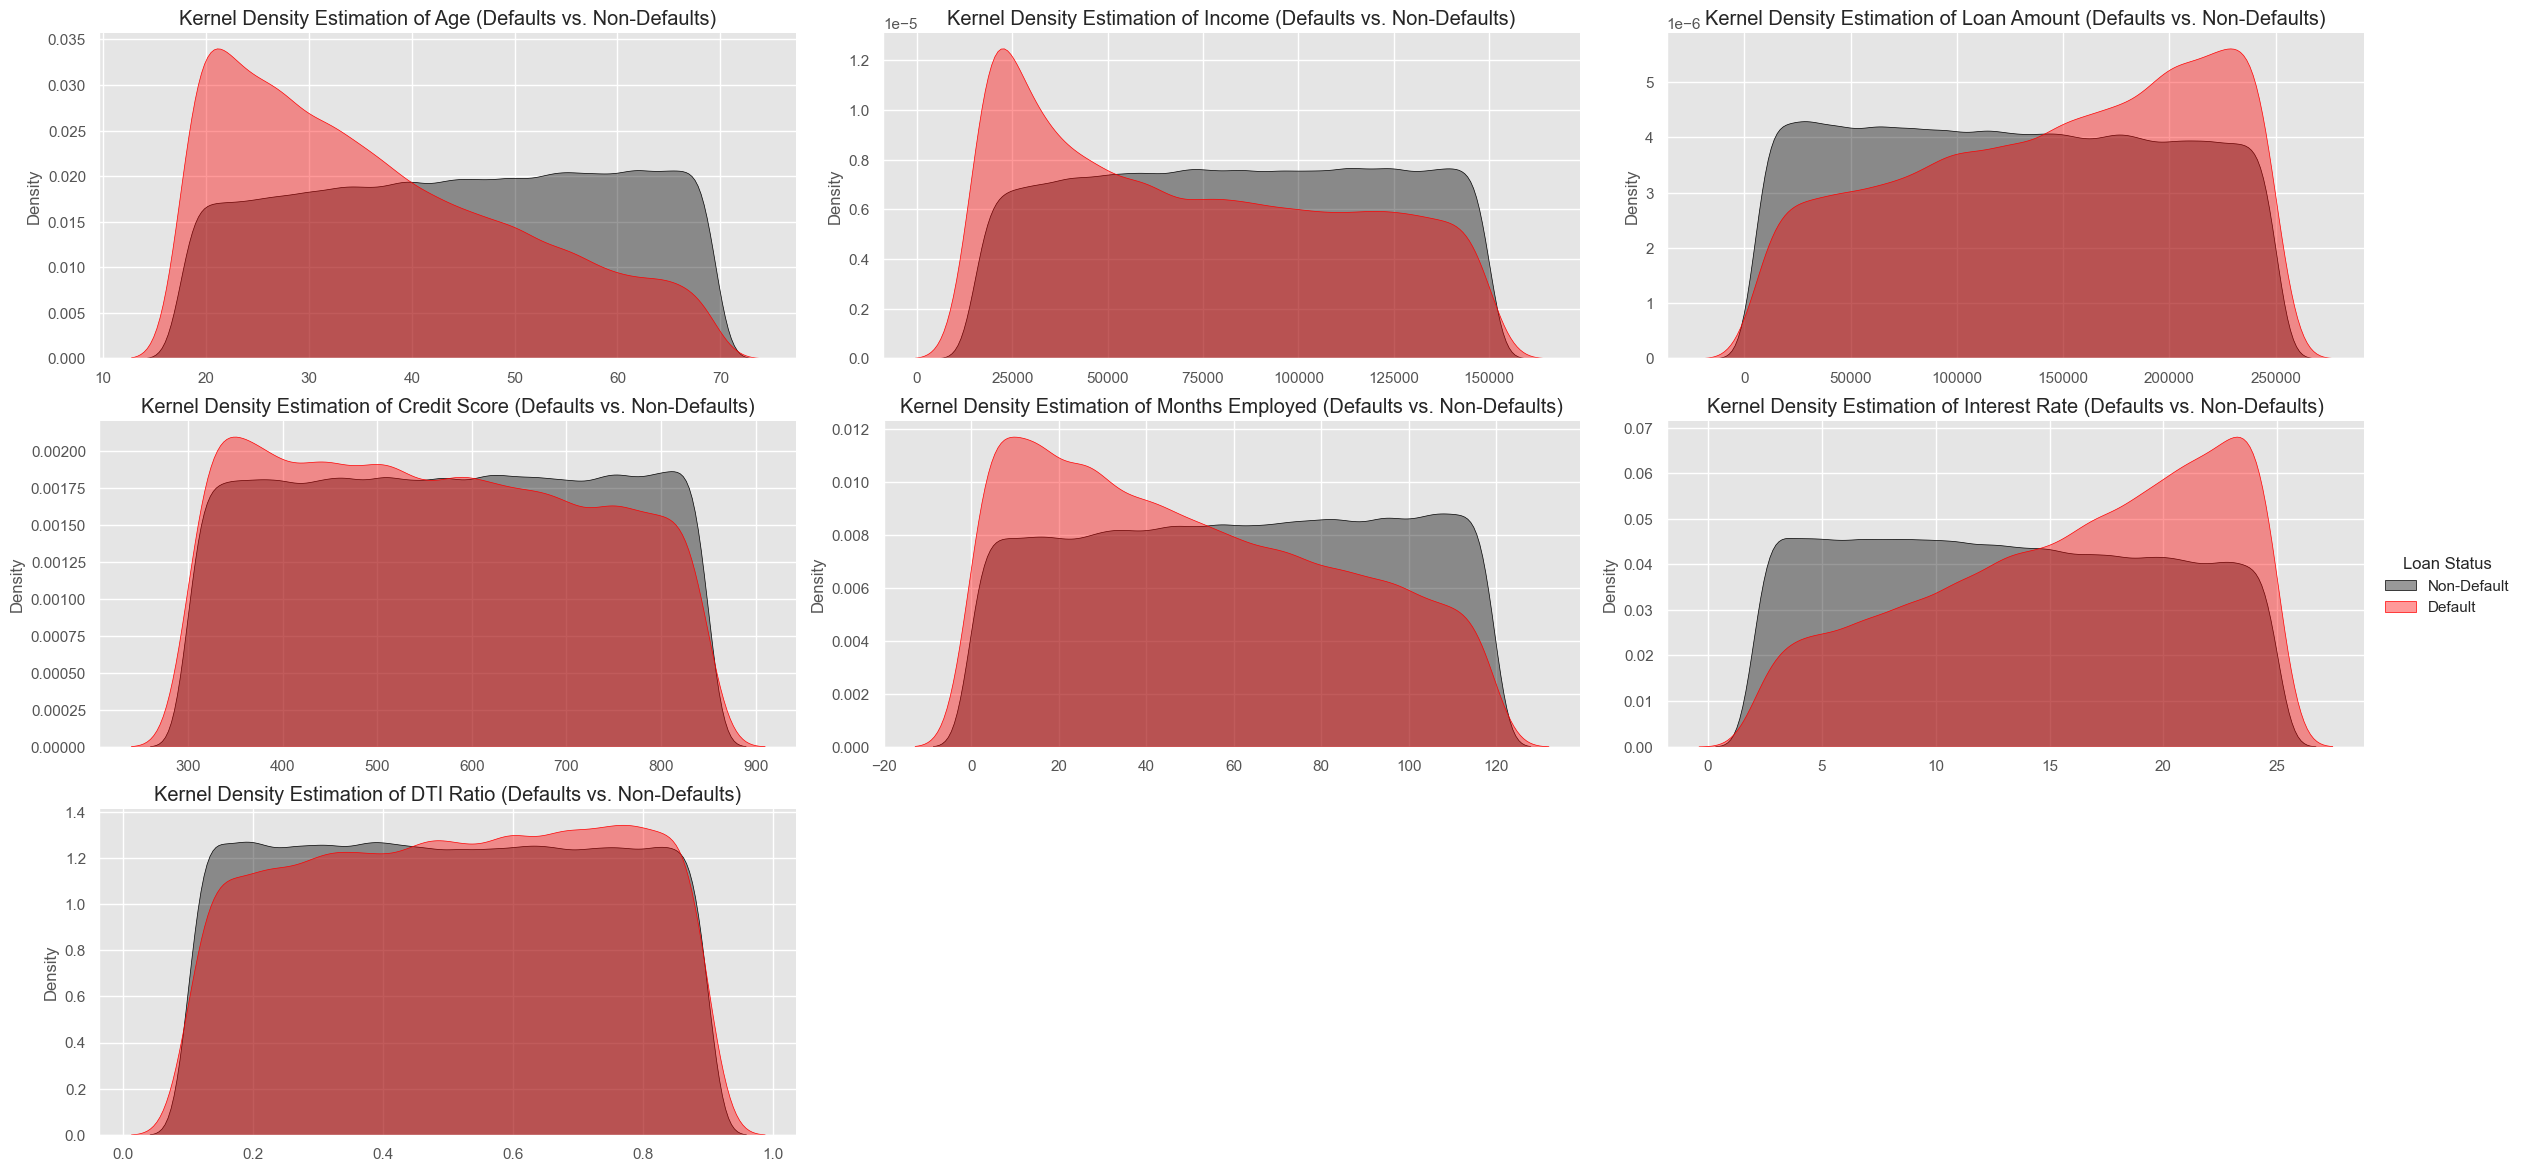

In [318]:
# Create a FacetGrid to generate separate plots for each variable in the 'Variable' column of the DataFrame
g = sns.FacetGrid(df_long_kde,  
                  col='Variable',  
                  height=4, 
                  aspect=2,  
                  sharex=False,  
                  sharey=False,  
                  hue='Default',  
                  palette=color_palette,  
                  col_wrap=3
                 )  

# Create kde plot for each variable in 'Variable' with 'Default' as the hue
g.map(sns.kdeplot,
      'Value',
      fill=True,
      alpha=0.4
     )  

# Add a legend 
g.add_legend()
g.legend.set_title('Loan Status')
g.legend.texts[0].set_text('Non-Default')
g.legend.texts[1].set_text('Default')

# Loop through each subplot to set titles and labels
for i, variable in enumerate(variables_kde):
    g.axes.flat[i].set_title(f'Kernel Density Estimation of {variable} (Defaults vs. Non-Defaults)')
    g.axes.flat[i].set_xlabel('')  
    g.axes.flat[i].set_ylabel('Density')  

# Display the plots
plt.show()

## Categorical Variables

In [319]:
# List of categorical variables for which to create bar plots
categorical_variables = [
    'Education',
    'EmploymentType',
    'MaritalStatus',
    'HasMortgage',
    'HasDependents',
    'LoanPurpose',
    'HasCoSigner'
]

# Transform the DataFrame from wide to long format for easier plotting
df_long_bar = df.melt(id_vars=['Default'],  
                      value_vars=categorical_variables,  
                      var_name='Variable', 
                      value_name='Value')  

# Display the first 5 rows of the transformed DataFrame
df_long_bar.head()

,Default,Variable,Value
0,NonDefault,Education,Bachelor's
1,NonDefault,Education,Master's
2,Default,Education,Master's
3,NonDefault,Education,High School
4,NonDefault,Education,Bachelor's


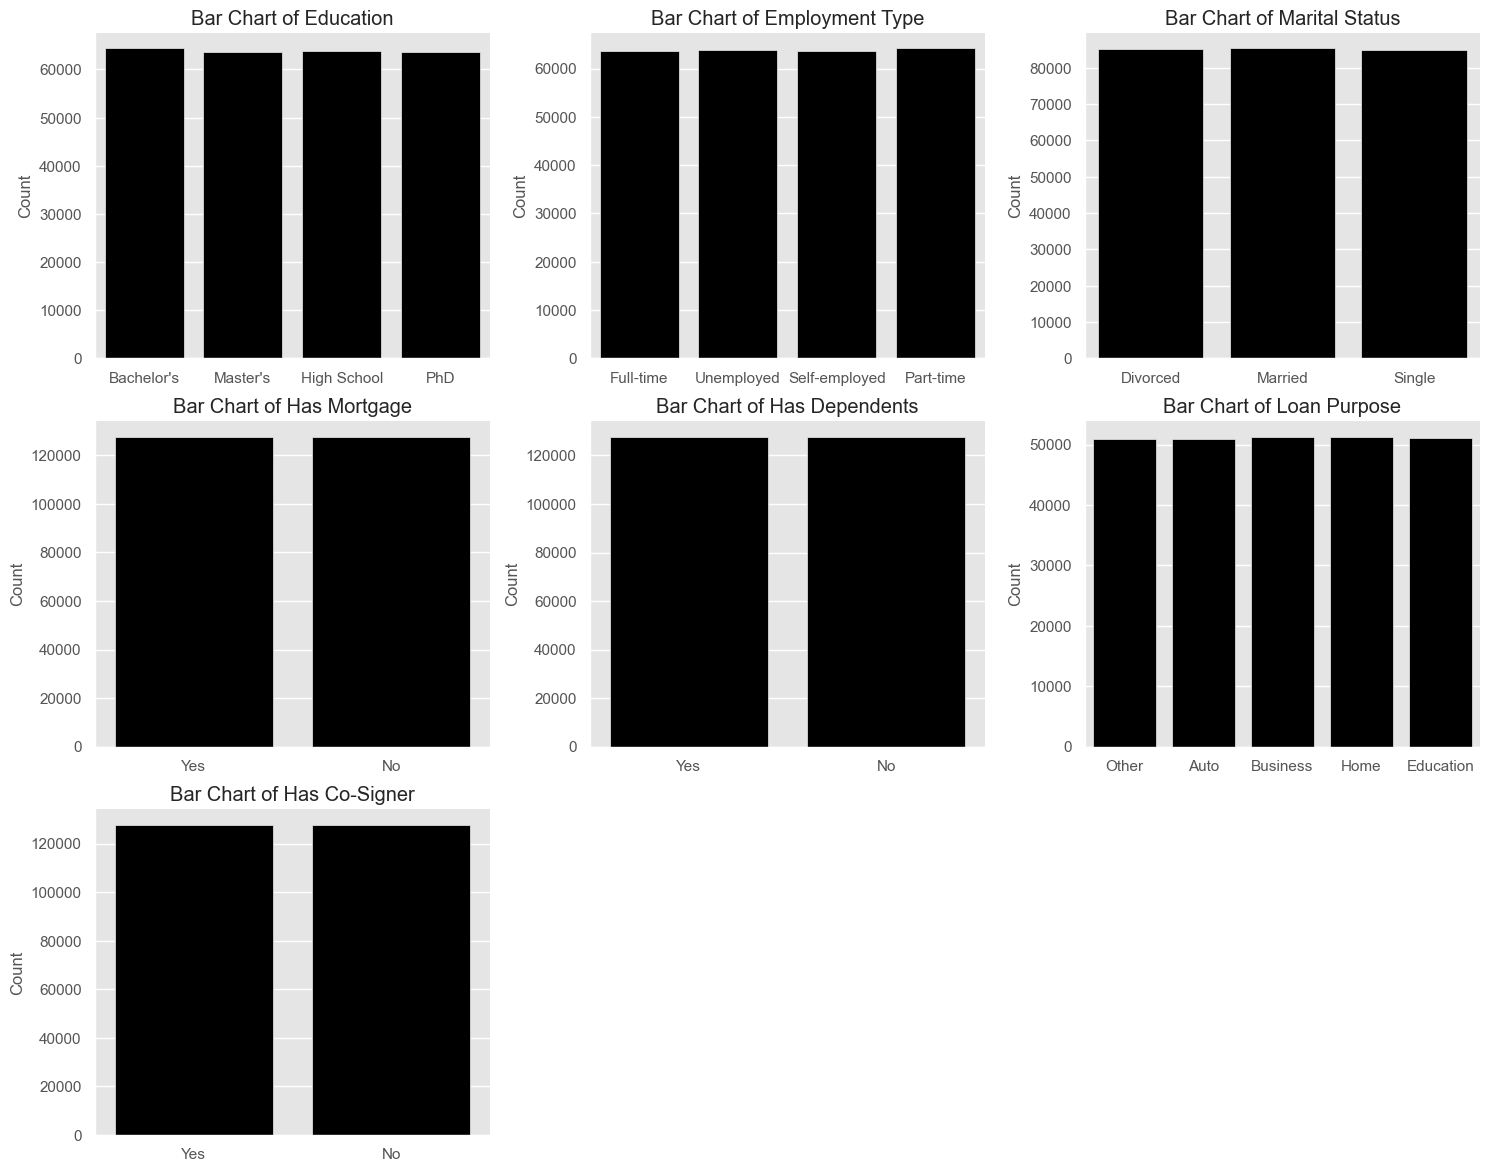

In [320]:
# Create a FacetGrid to generate separate plots for each variable in the 'Variable' column of the DataFrame
g = sns.FacetGrid(df_long_bar,  
                  col='Variable',  
                  height=4,  
                  aspect=1.25,  
                  sharex=False,  
                  sharey=False,  
                  col_wrap=3)  

# Create count plot for each variable in 'Variable'
g.map_dataframe(sns.countplot,
                'Value',
                color='black'
               )  

# List of variable names for setting subplot titles
variables_bar = ['Education', 'Employment Type', 'Marital Status',
                 'Has Mortgage', 'Has Dependents', 'Loan Purpose',
                 'Has Co-Signer']

# Loop through each subplot to set titles and labels
for i, variable in enumerate(variables_bar):
    g.axes.flat[i].set_title(f'Bar Chart of {variable}')  
    g.axes.flat[i].set_xlabel('')  
    g.axes.flat[i].set_ylabel('Count')  

# Display the plots
plt.show()

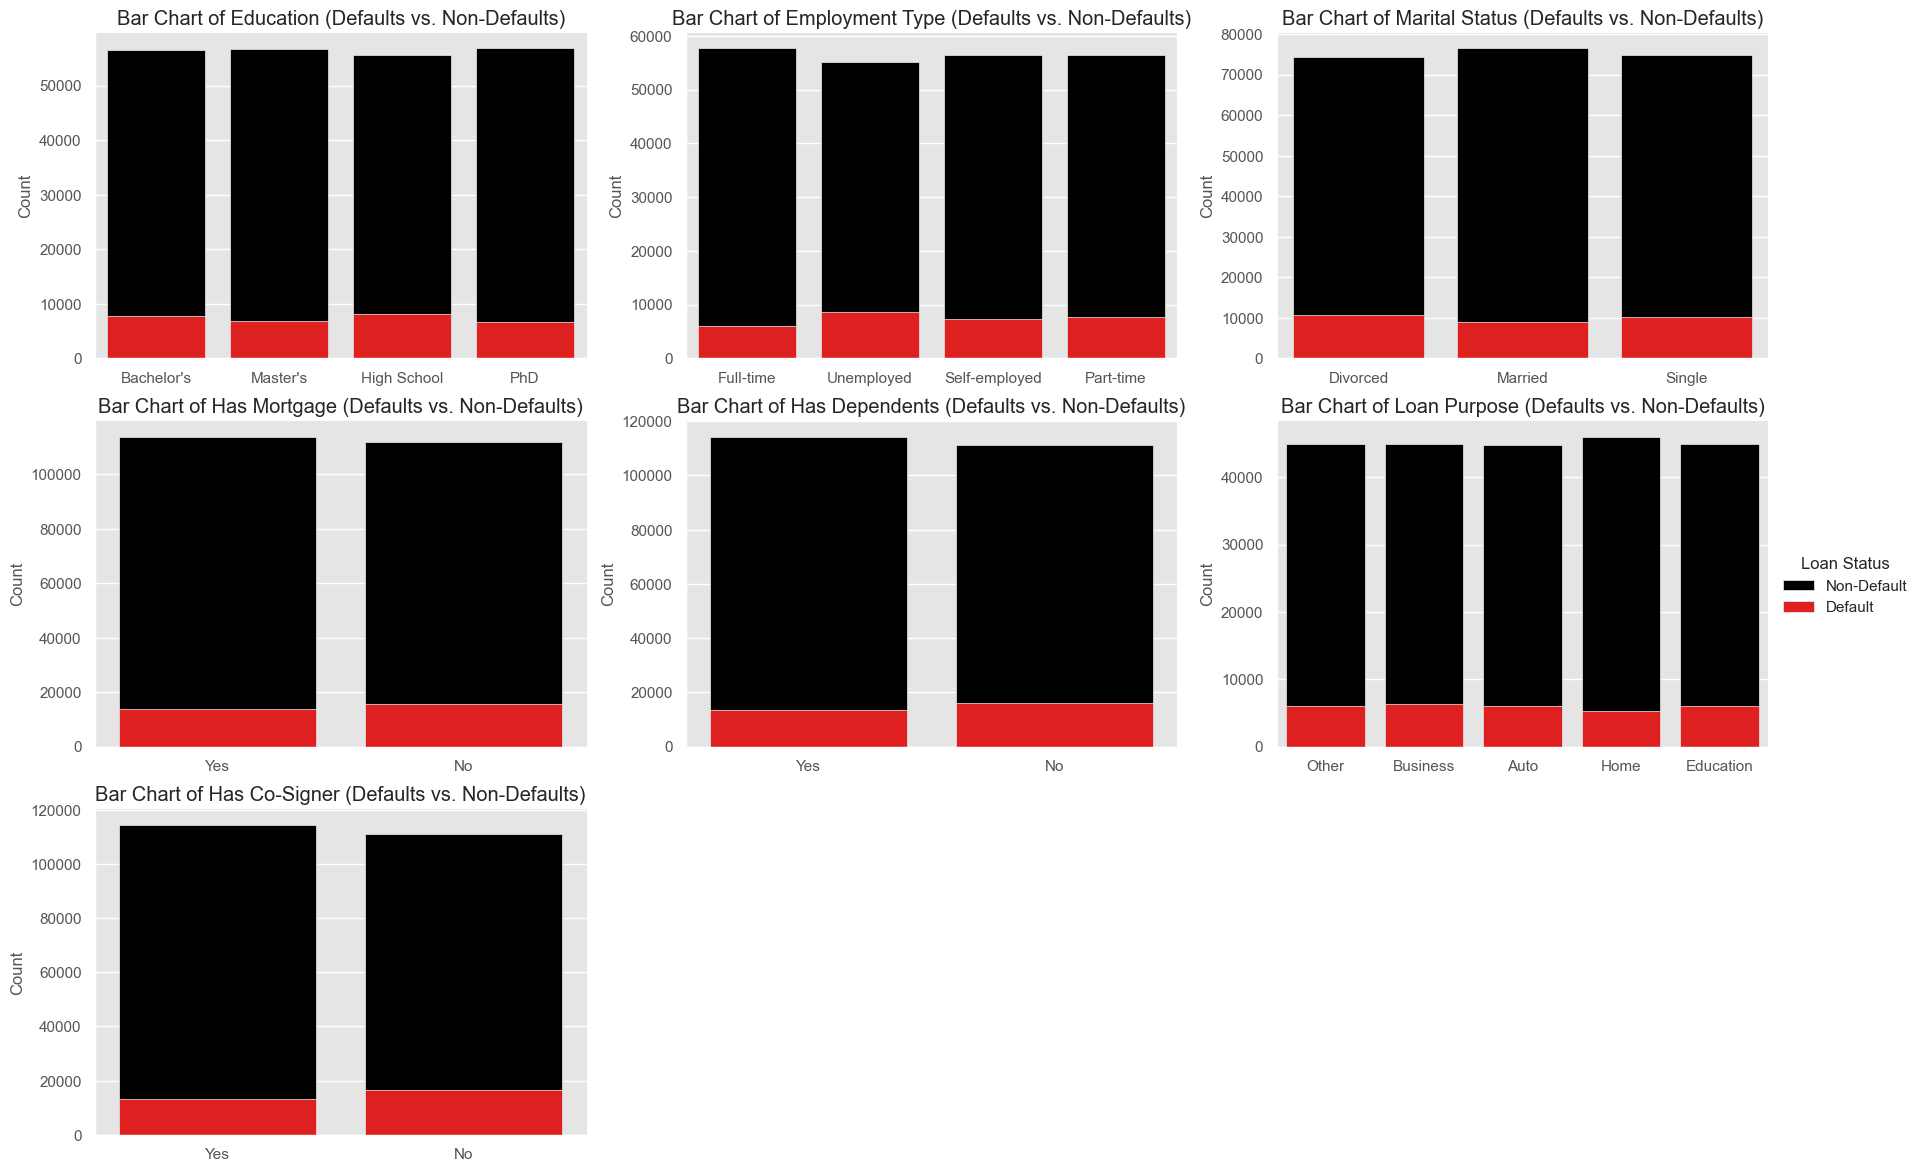

In [321]:
# Create a FacetGrid to generate separate plots for each variable in the 'Variable' column of the DataFrame
g = sns.FacetGrid(df_long_bar,  
                  col='Variable', 
                  height=4, 
                  aspect=1.5,  
                  sharex=False,  
                  sharey=False,  
                  hue='Default',  
                  palette=color_palette,  
                  col_wrap=3) 

# Create a count plot for each variable in 'Variable' with 'Default' as the hue
g.map_dataframe(sns.countplot,
                'Value'
               )  

# Add a legend 
g.add_legend()
g.legend.set_title('Loan Status')
g.legend.texts[0].set_text('Non-Default')
g.legend.texts[1].set_text('Default')

# Loop through each subplot to set titles and labels
for i, variable in enumerate(variables_bar):
    g.axes.flat[i].set_title(f'Bar Chart of {variable} (Defaults vs. Non-Defaults)')  
    g.axes.flat[i].set_xlabel('')  
    g.axes.flat[i].set_ylabel('Count') 

# Display the plots
plt.show()

## Outlier Detection

In [322]:
# List of continuous variables for which to detect outliers
continuous_variables = [
    'Age',
    'Income',
    'LoanAmount',
    'CreditScore',
    'MonthsEmployed',
    'InterestRate',
    'DTIRatio',
    'NumCreditLines',
    'LoanTerm'
]

# Transform the DataFrame from wide to long format for easier plotting
df_long_cts = df.melt(id_vars=['Default'],  
                      value_vars=continuous_variables,  
                      var_name='Variable',  
                      value_name='Value')  

# Display the first 5 rows of the transformed DataFrame
df_long_cts.head()

,Default,Variable,Value
0,NonDefault,Age,56.0
1,NonDefault,Age,69.0
2,Default,Age,46.0
3,NonDefault,Age,32.0
4,NonDefault,Age,60.0


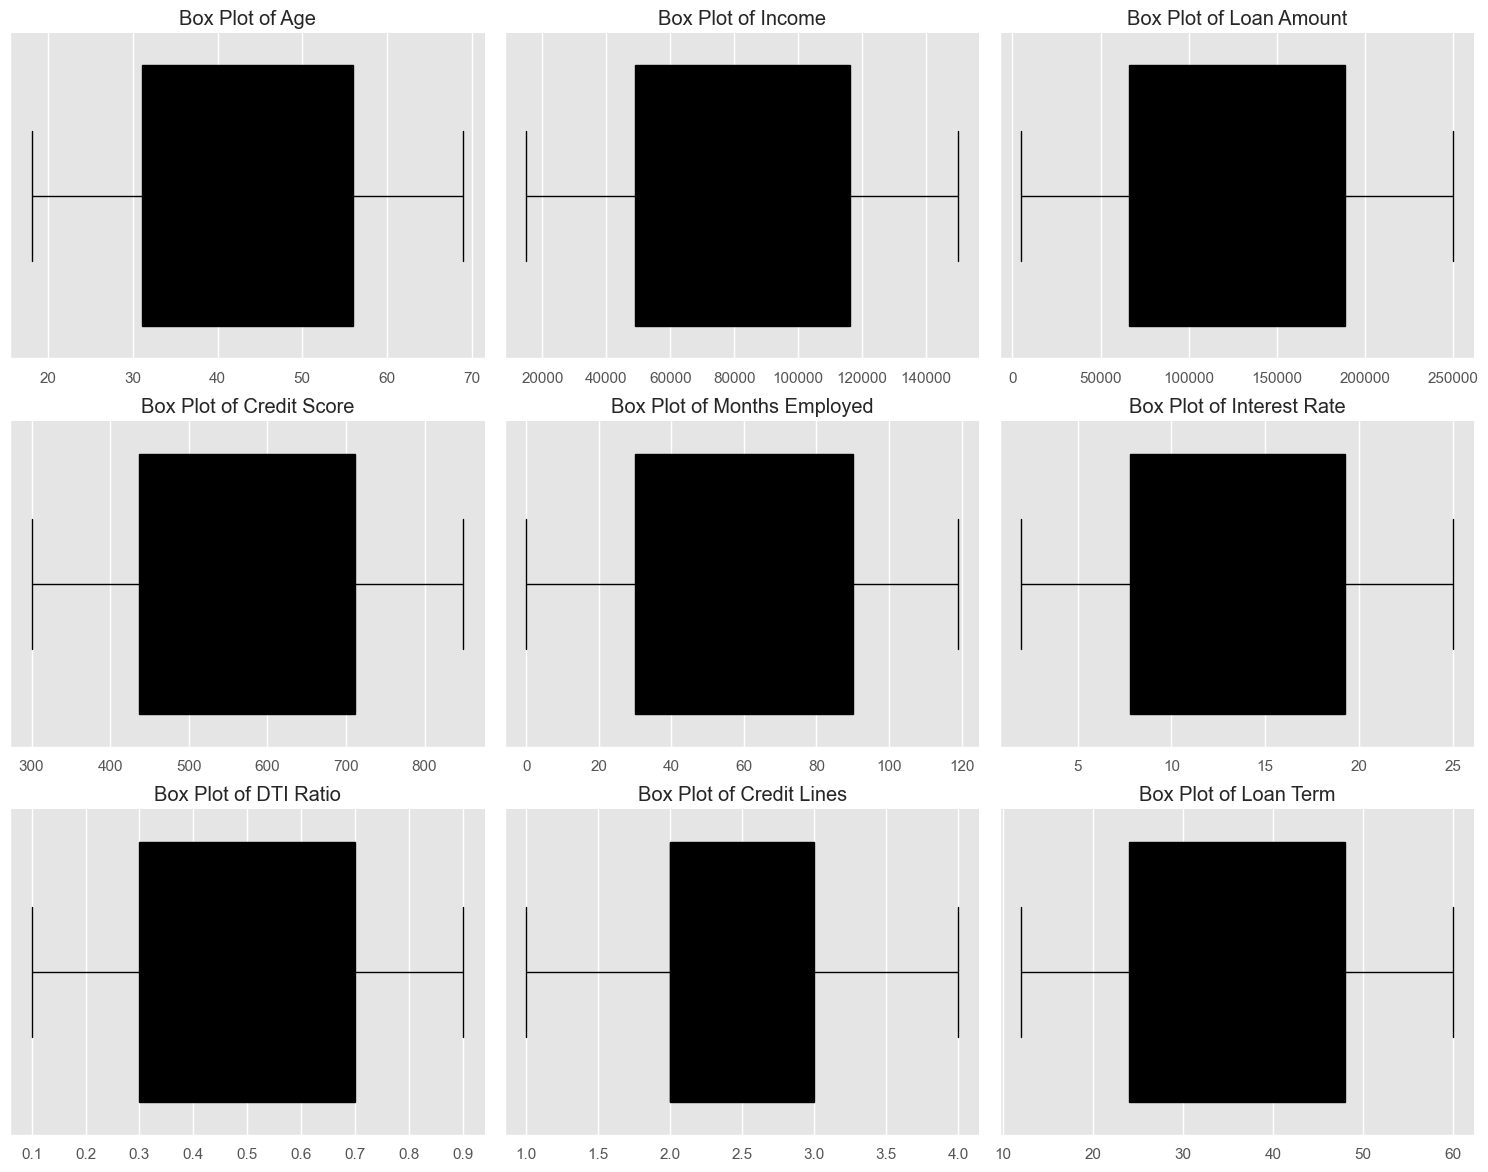

In [323]:
# Create a FacetGrid to generate separate plots for each variable in the 'Variable' column of the DataFrame
g = sns.FacetGrid(df_long_cts,  
                  col='Variable',  
                  height=4,  
                  aspect=1.25,  
                  sharex=False,  
                  sharey=False,  
                  col_wrap=3
                 )  

# Create a bixplot plot for each variable in 'Variable' 
g.map_dataframe(sns.boxplot,
                'Value',
                color='black'
               )  

# List of variable names for setting subplot titles
variables_histplot = ['Age', 'Income', 'Loan Amount',
                      'Credit Score', 'Months Employed', 'Interest Rate',
                      'DTI Ratio', 'Credit Lines', 'Loan Term']

# Loop through each subplot to set titles and labels
for i, variable in enumerate(variables_histplot):
    g.axes.flat[i].set_title(f'Box Plot of {variable}')  
    g.axes.flat[i].set_xlabel('')  

# Display the plots
plt.show()